In [1]:
import transformer_lens
import torch
import numpy as np 
import matplotlib.pyplot as plt

c:\Users\Laura and Steve\Desktop\quantum_mech_interp\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Laura and Steve\AppData\Local\Temp\ipykernel_19240\2503952070.py:3: RuntimeWarning: divide by zero encountered in log
  ax.plot(-np.log(-np.load("results/E_Ising_32_4_2_0.npy")))


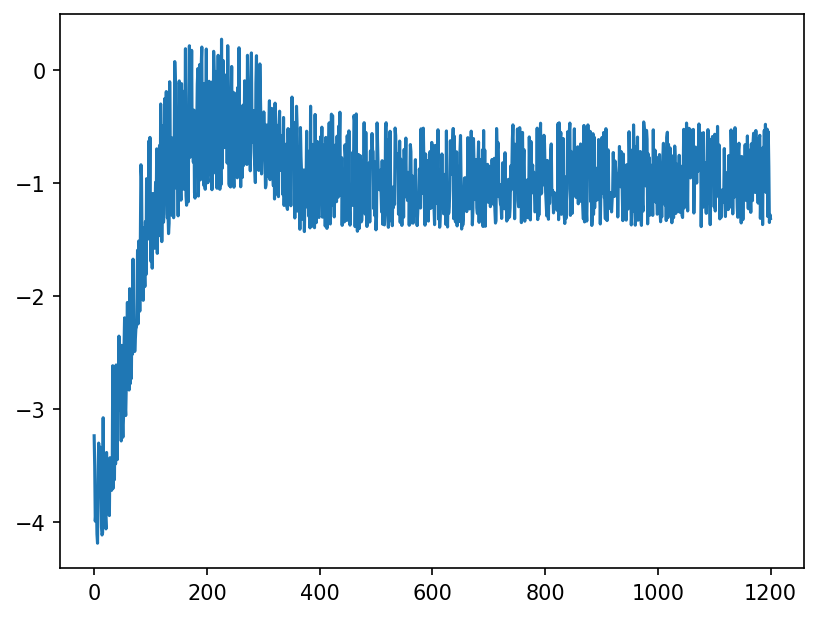

In [5]:
fig, ax = plt.subplots(dpi=150)

ax.plot(-np.log(-np.load("results/E_Ising_32_4_2_0.npy")))

In [2]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [3]:
if torch.cuda.is_available():
    print("using gpu")
    device = torch.device("cuda")
else:
    print("using cpu")
    device = torch.device('cpu')

using gpu


In [4]:
system_size=15

In [5]:
cfg = transformer_lens.HookedTransformerConfig(
    d_model=32,
    d_head = 8,
    n_layers=2,
    n_ctx=1+system_size,
    n_heads = 4,
    d_mlp = None,
    d_vocab=3,
    act_fn='relu',
    attn_only=True,
    d_vocab_out=1,
    device='cuda'
)

hooked_model = transformer_lens.HookedTransformer(
    cfg
)

hooked_model.to(device)

Moving model to device:  cuda


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-1): 2 x TransformerBlock(
      (ln1): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (hook_resid_pre): HookPoint()
      (hook_resid_post): HookPoint()
    )
  )
  (ln_final): LayerNorm(
    (hook_scale): HookPoint()
    (hook_normalized): HookPoint()
  )
  (unembed): Unembed()
)

In [6]:
def adapt_hooked_model(hooked_model):
    # give the hooked model params that are assumed to exist
    hooked_model.system_size = hooked_model.cfg.n_ctx-1
    hooked_model.system_sizes = [hooked_model.system_size]
    hooked_model.param_range = None
    hooked_model.embedding_size = hooked_model.cfg.d_model
    hooked_model.n_head = hooked_model.cfg.n_heads
    hooked_model.n_layers = hooked_model.cfg.n_layers
    hooked_model.size_idx=0
    


In [7]:
adapt_hooked_model(hooked_model)

In [8]:
from pruned_tqs.Hamiltonian import Ising
from pruned_tqs.optimizer import Optimizer

In [9]:
system_size = hooked_model.system_size

Hamiltonians = [Ising(system_size, periodic=False)]

param_dim = Hamiltonians[0].param_dim

c:\Users\Laura and Steve\Desktop\quantum_mech_interp\quantum_mech_interp\pruned_tqs\Hamiltonian_utils.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  system_size = torch.tensor(system_size, dtype=torch.int64).reshape(-1)


In [10]:
Hamiltonians[0].param_range

tensor([[-1.5000],
        [-0.5000]])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
optim = Optimizer(hooked_model, Hamiltonians, point_of_interest=None)

In [13]:
optim.train(
    500_000,
    batch=20000,
    max_unique=10,
    param_range=None, # use the hamiltonian's
    fine_tuning=False,
    use_SR=False,
    ensemble_id=int(False),
)

this is param range (-1.5, -0.5)
i = 0	 E_real = -25.550968	 E_imag = 0.000000	 E_var = 13547.519531	 n = 15	 lr = 4.3933e-07 t = 2.576124  t_optim = 0.650232
this is param range (-1.5, -0.5)
i = 1	 E_real = -33.439384	 E_imag = 0.000000	 E_var = 27987.474609	 n = 15	 lr = 8.7866e-07 t = 1.393296  t_optim = 0.007973
this is param range (-1.5, -0.5)
i = 2	 E_real = -54.423630	 E_imag = -0.000000	 E_var = 95600.281250	 n = 15	 lr = 1.3180e-06 t = 1.995667  t_optim = 0.008006
this is param range (-1.5, -0.5)
i = 3	 E_real = -50.401733	 E_imag = 0.000000	 E_var = 80230.367188	 n = 15	 lr = 1.7573e-06 t = 1.996658  t_optim = 0.007979
this is param range (-1.5, -0.5)
i = 4	 E_real = -44.955639	 E_imag = -0.000000	 E_var = 59668.261719	 n = 15	 lr = 2.1966e-06 t = 2.001792  t_optim = 0.007950
this is param range (-1.5, -0.5)
i = 5	 E_real = -60.986248	 E_imag = -0.000000	 E_var = 130616.843750	 n = 15	 lr = 2.6360e-06 t = 2.011619  t_optim = 0.007978
this is param range (-1.5, -0.5)
i = 6	 E_

In [ ]:
jhg

NameError: name 'jhg' is not defined

In [ ]:
optim.model.evaluate_log_prob(
    1, 
    torch.tensor([[1,1,1,1]])
)

tensor([-19.7230], grad_fn=<SumBackward1>)

In [ ]:
optim.model.evaluate_log_prob(
    1, 
    torch.tensor([[0,1,0,1]])
)

tensor([-9.4222], grad_fn=<SumBackward1>)

In [ ]:
vals = []
for i in range(2**):
    b = bin(i)[2:]
    b = '0'*(4-len(b))+b 
    vals.append([float(int(x)) for x in b])

In [ ]:
outs = optim.model.evaluate_log_prob(
    1, 
    torch.tensor(vals)
)

In [ ]:
from pruned_tqs import model_utils

In [ ]:
outs.shape

torch.Size([16])

In [ ]:
vals

[[0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 1.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 1.0],
 [0.0, 1.0, 1.0, 0.0],
 [0.0, 1.0, 1.0, 1.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 1.0, 1.0],
 [1.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 1.0],
 [1.0, 1.0, 1.0, 0.0],
 [1.0, 1.0, 1.0, 1.0]]

In [ ]:
to_plot=model_utils.compute_psi(optim.model, samples=torch.tensor(vals), symmetry=Hamiltonians[0].symmetry)

In [ ]:
to_plot[0].detach()

tensor([ -5.0833,  -9.3138,  -8.0829, -11.6270])

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

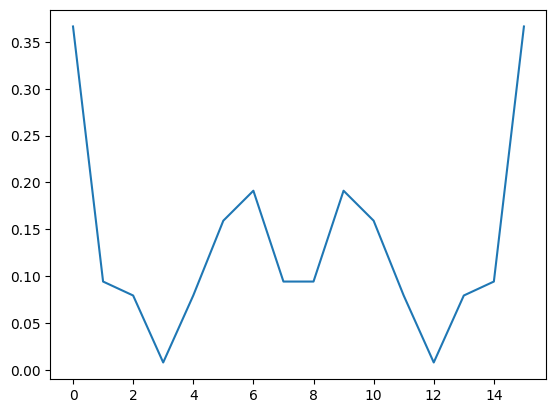

In [ ]:
plt.plot(np.exp(to_plot[0].detach()))

In [ ]:
Hamiltonians[0].full_H().todense()

matrix([[-3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1., -1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  1.,  1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  1.,  0.,  1.,
          0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
          1.,  0.,  0.],
        [ 

In [ ]:

Hamiltonians = [Ising(2, periodic=False)]

Hamiltonians[0].h=1

In [ ]:
Hamiltonians = [Ising(2, periodic=False)]

Hamiltonians[0].h=-1

In [ ]:
ws, vs = np.linalg.eigh(Hamiltonians[0].full_H().todense())

In [ ]:
Hamiltonians[0].full_H().todense()

matrix([[-1., -1., -1.,  0.],
        [-1.,  1.,  0., -1.],
        [-1.,  0.,  1., -1.],
        [ 0., -1., -1., -1.]])

In [ ]:
Hamiltonians[0]

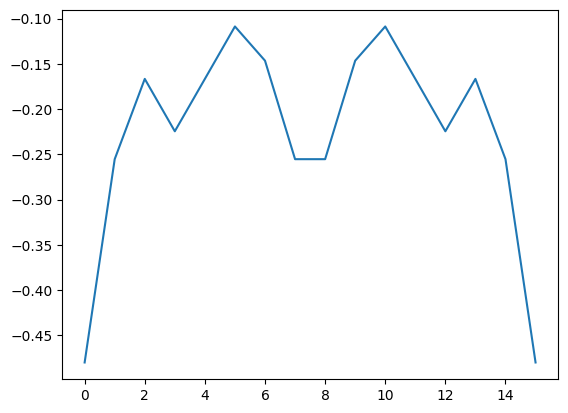

In [ ]:
plt.plot(vs[:, 0])

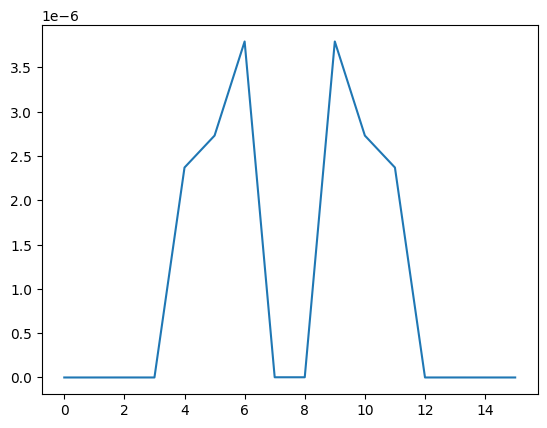

In [ ]:
plt.plot(np.exp(outs.detach().numpy()+outs.detach().numpy()[::-1]))